In [310]:
import math
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid.inset_locator import inset_axes
%matplotlib inline
import pandas as pd
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [2]:
file = os.path.join(os.getcwd(),'20230109 12ca5 ASMS then add LibQC.csv')
data = pd.read_csv(file)
cols = [a for a in data.columns if "UMAP" in a]

peps = data['Peptide']
labels = data['Label']
C1 = data['UMAP Fingerprint C1']
C2 = data['UMAP Fingerprint C2']

peps_cluster = data[data['Label'] == 'Specific']['Peptide']
C1_cluster = data[data['Label'] == 'Specific']['UMAP Fingerprint C1']
C2_cluster = data[data['Label'] == 'Specific']['UMAP Fingerprint C2']

In [3]:
C = np.asarray([(C1s,C2s) for C1s,C2s in zip(C1_cluster,C2_cluster)])

In [4]:
epsy = 0.0931
sampley = 7
model = DBSCAN(eps=epsy, min_samples=sampley) # define the model
print('Cluster detection, eps is ' + str(epsy) + ', sample_min ' + str(sampley))

clusters = [x+1 for x in model.fit_predict(C)] # fit model, predict clusters. Every row has a cluster associated.
# note that the -1 labeled cluster is noise,so we adjusted to 0
uniq_clusters = np.unique(clusters)

Cluster detection, eps is 0.0931, sample_min 7


In [5]:
my_colors = ['tab:blue','tab:orange','tab:green','tab:red',
             'tab:purple','tab:brown','tab:pink','tab:gray',
             'tab:olive','tab:cyan','tab:gray']
cmap = my_colors
j = 0
while len(cmap) < len(uniq_clusters) + 1:
    if j == len(my_colors):
        j = 0
    cmap.append(my_colors[j])
    j += 1

In [6]:
data_clus = pd.DataFrame()
data_clus['Peptide'] = peps_cluster
data_clus['C1'] = C1_cluster
data_clus['C2'] = C2_cluster
data_clus['Cluster'] = clusters

In [7]:
data_clus

,Peptide,C1,C2,Cluster
0,VWRDAEDYATFP,4.487755,8.108466,1
1,TPDWDGPDYAAH,-0.384460,1.382179,0
2,EMDAPDYASWEP,10.274223,7.065327,2
3,SVEDDAPDYADF,-0.482243,1.395353,3
4,MMDMDLQDYAGL,0.670447,1.537157,4
...,...,...,...,...
4097,FMRWHDKPDYSH,8.631372,1.709145,7
4098,YEYFTDSHDYAH,9.981120,3.264649,14
4099,LLKYTDRHDYAW,10.216375,3.265264,14
4100,DTDWPDYSSFLF,10.368135,7.117136,2


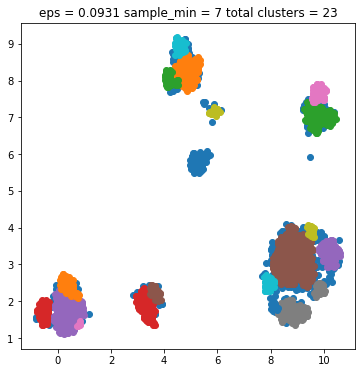

In [8]:
plt.rcParams['figure.figsize'] = (6,6)

fig,ax = plt.subplots(figsize=(6,6))
for i in uniq_clusters:
    rows = data_clus.query('Cluster == @i')
    x = rows['C1']
    y = rows['C2']
    ax.scatter(x,y,label=f'Cluster {i}')
    
# plt.scatter(Center_ave[:,0], Center_ave[:,1], alpha=1, s=200, c='black')
plot_title = f'eps = {epsy} sample_min = {sampley} total clusters = {len(uniq_clusters)}'
plt.title(plot_title,fontsize=12)
plt.savefig(os.path.join(os.getcwd(),'Clustering Opt',plot_title + '.png'))

### Now loop and optimize

In [11]:
epsy_list = np.linspace(0.05,0.2,20)
sampley_list = np.arange(8,20,2)

for epsy in epsy_list:
    for sampley in sampley_list:
        model = DBSCAN(eps=epsy, min_samples=sampley)
        clusters = [x+1 for x in model.fit_predict(C)] # fit model, predict clusters. Every row has a cluster associated.
        # note that the -1 labeled cluster is noise,so we adjusted to 0
        uniq_clusters = np.unique(clusters)

        data_clus = pd.DataFrame()
        data_clus['Peptide'] = peps_cluster
        data_clus['C1'] = C1_cluster
        data_clus['C2'] = C2_cluster
        data_clus['Cluster'] = clusters
        
        fig,ax = plt.subplots(figsize=(6,6))
        for i in uniq_clusters:
            rows = data_clus.query('Cluster == @i')
            x = rows['C1']
            y = rows['C2']
            ax.scatter(x,y,label=f'Cluster {i}')

        # plt.scatter(Center_ave[:,0], Center_ave[:,1], alpha=1, s=200, c='black')
        plot_title = f'eps = {epsy} sample_min = {sampley} total clusters = {len(uniq_clusters)}'
        plt.title(plot_title,fontsize=12)
        plt.savefig(os.path.join(os.getcwd(),'Clustering Opt',plot_title + '.png'))
        plt.close()

Cluster detection, eps is 0.18421, sample_min 14


Text(0.5, 1.0, 'eps = 0.18421 sample_min = 14 total clusters = 12')

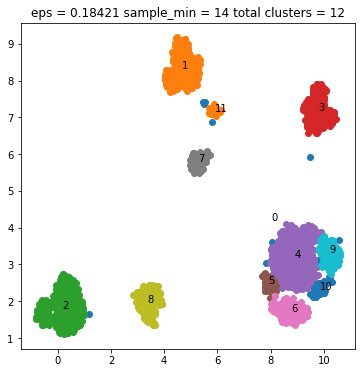

In [34]:
epsy = 0.18421
sampley = 14
model = DBSCAN(eps=epsy, min_samples=sampley) # define the model
print('Cluster detection, eps is ' + str(epsy) + ', sample_min ' + str(sampley))

clusters = [x+1 for x in model.fit_predict(C)] # fit model, predict clusters. Every row has a cluster associated.
# note that the -1 labeled cluster is noise,so we adjusted to 0
uniq_clusters = np.unique(clusters)

my_colors = ['tab:blue','tab:orange','tab:green','tab:red',
             'tab:purple','tab:brown','tab:pink','tab:gray',
             'tab:olive','tab:cyan']
cmap = my_colors
j = 0
while len(cmap) < len(uniq_clusters) + 1:
    if j == len(my_colors):
        j = 0
    cmap.append(my_colors[j])
    j += 1

data_clus = pd.DataFrame()
data_clus['Peptide'] = peps_cluster
data_clus['C1'] = C1_cluster
data_clus['C2'] = C2_cluster
data_clus['Cluster'] = clusters

data_final = data_clus.query('Cluster != 0')

nonclustered = data_clus.query('Cluster == 0')

fig,ax = plt.subplots(figsize=(6,6))
for i in uniq_clusters:
    rows = data_clus.query('Cluster == @i')
    x = rows['C1']
    y = rows['C2']
    cent_x = np.average(x)
    cent_y = np.average(y)
    plt.annotate(i,(cent_x,cent_y))
    ax.scatter(x,y,label=f'Cluster {i}',c=cmap[i])

# plt.scatter(Center_ave[:,0], Center_ave[:,1], alpha=1, s=200, c='black')
plot_title = f'eps = {epsy} sample_min = {sampley} total clusters = {len(uniq_clusters)}'
plt.title(plot_title,fontsize=12)

In [35]:
peps_lib = data[data['Label'] != 'Specific']['Peptide']
C1_lib = data[data['Label'] != 'Specific']['UMAP Fingerprint C1']
C2_lib = data[data['Label'] != 'Specific']['UMAP Fingerprint C2']

data_lib = pd.DataFrame()
data_lib['Peptide'] = peps_lib
data_lib['C1'] = C1_lib
data_lib['C2'] = C2_lib
data_lib['Cluster'] = np.zeros(len(C1_lib))

data_lib_all = pd.concat([data_lib,nonclustered])

In [36]:
data_lib_all

,Peptide,C1,C2,Cluster
9,VDDLRYASSNQL,3.469656,2.381603,0.0
15,MQYLPDLMDYDS,8.329788,3.715905,0.0
30,LPWKWPPFYERF,-0.860134,1.722628,0.0
32,WSWDVDVSYWAW,7.590517,2.404717,0.0
46,AMKLMDLPMYSD,8.879419,1.564393,0.0
...,...,...,...,...
3337,RGVYHDWHDYAE,10.213405,2.608120,0.0
3401,TDVPDYRDYADY,1.167360,1.660076,0.0
3709,RLWFMDWHDYSH,10.233768,2.614106,0.0
3973,ELDTEDYADYAD,9.497151,5.922849,0.0


### Plot all data

Text(0, 0.5, 'UMAP Fingerprint C2')

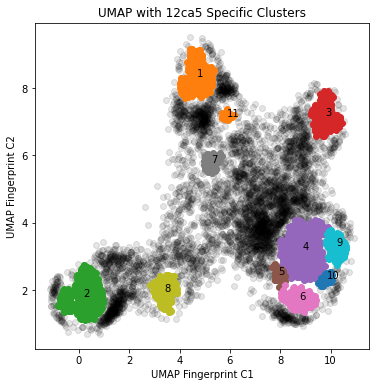

In [46]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(data_lib_all['C1'],data_lib_all['C2'],c='k',alpha=0.1)
centers = []
for i in uniq_clusters:
    rows = data_final.query('Cluster == @i')
    x = rows['C1']
    y = rows['C2']
    cent_x = np.average(x)
    cent_y = np.average(y)
    if not math.isnan(cent_x):
        centers.append((cent_x,cent_y))
    plt.annotate(i,(cent_x,cent_y))
    ax.scatter(x,y,label=f'Cluster {i}',c=cmap[i])
ax.set_title('UMAP with 12ca5 Specific Clusters')
ax.set_xlabel('UMAP Fingerprint C1')
ax.set_ylabel('UMAP Fingerprint C2')

In [74]:
C_all = np.asarray([(C1s,C2s) for C1s,C2s in zip(C1,C2)])

C_lib = np.asarray([(C1s,C2s) for C1s,C2s in zip(C1_lib,C2_lib)])
len(C_all),len(C_lib)

(9151, 5639)

In [50]:
def find_distance(coord,point):
    x_1 = coord[0]
    y_1 = coord[1]
    x_2 = point[0]
    y_2 = point[1]
    return np.sqrt((x_2 - x_1)**2 + (y_2 - y_1)**2)

In [60]:
clusters_spec = np.unique(data_final['Cluster'])
print(len(centers),len(clusters_spec))

11 11


In [77]:
# all points

rs_all = []
for center in centers:
    r_sub = []
    for p in C_all:
        r = find_distance(center,p)
        r_sub.append(r)
    rs_all.append(r_sub)
    
# individual cluster distances

rs_spec = []

for i,center in enumerate(centers):
    r_sub = []
    data_sub = data_final.query('Cluster == @i+1')
    sub_C1 = data_sub['C1']
    sub_C2 = data_sub['C2']
    point_list = [(c1,c2) for c1,c2 in zip(sub_C1,sub_C2)]
    for p in point_list:
        r = find_distance(center,p)
        r_sub.append(r)
    rs_spec.append(r_sub)
    
# library points

rs_lib = []
for center in centers:
    r_sub = []
    for p in C_lib:
        r = find_distance(center,p)
        r_sub.append(r)
    rs_lib.append(r_sub)

1.0
1.0


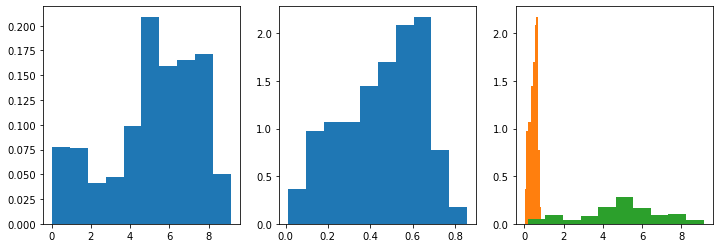

In [89]:
fig,axs = plt.subplots(ncols=3,nrows=1,figsize=(12,4))
axs[0].hist(rs_all[0],density = True)
axs[1].hist(rs_spec[0],density = True)
axs[2].hist(rs_lib[0],density = True)

# pdf, bins, patches = axs[2].hist(rs_all[0],density=True)
# print(np.sum(pdf * np.diff(bins)))
pdf, bins, patches = axs[2].hist(rs_spec[0],density=True)
print(np.sum(pdf * np.diff(bins)))
pdf, bins, patches = axs[2].hist(rs_lib[0],density=True)
print(np.sum(pdf * np.diff(bins)))

In [182]:
r_max = max([max(a) for a in rs_all])
bins = np.linspace(0,r_max,1000)

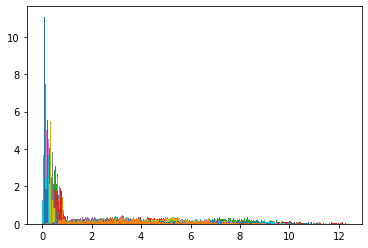

In [183]:
pdf_specs = []
bins_specs = []
patches_specs = []

for rs in rs_spec:
    pdf_spec, bins_spec, patches_spec = plt.hist(rs,bins=bins,density=True)
    pdf_specs.append(pdf_spec)
    bins_specs.append(bins_spec)
    patches_specs.append(patches_spec)
   
pdf_libs = []
bins_libs = []
patches_libs = []
for rs in rs_lib:
    pdf_lib, bins_lib, patches_lib = plt.hist(rs,bins=bins,density=True)
    pdf_libs.append(pdf_lib)
    bins_libs.append(bins_lib)
    patches_libs.append(patches_lib)

In [184]:
r_50s = []
for i,pdf in enumerate(pdf_specs):
    tot = 0
    bins_use = bins_specs[i]
    for j,p in enumerate(pdf):
        tot += p * np.diff(bins_use)[j]
        if tot > 0.5:
            r_50s.append(bins_use[j])   # bins represent upper end of histogram x axis, which is r
            print(bins_use[j])
            break

0.4804373320511603
0.5666696737013686
0.394204990400952
0.5543507677513387
0.13550796545032726
0.2833348368506843
0.197102495200476
0.30797264875074376
0.24637811900059503
0.12318905950029752
0.11087015355026776


In [289]:
r_50s

[0.4804373320511603,
 0.5666696737013686,
 0.394204990400952,
 0.5543507677513387,
 0.13550796545032726,
 0.2833348368506843,
 0.197102495200476,
 0.30797264875074376,
 0.24637811900059503,
 0.12318905950029752,
 0.11087015355026776]

#### Now we have the r_50, redo histogram over appropriate range

<ipython-input-246-0d6866c2fef2>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-246-0d6866c2fef2>:13: RuntimeWarning: invalid value encountered in double_scalars
  ratio_spec = [a/(a + b) for a,b in zip(p,pl)]
<ipython-input-246-0d6866c2fef2>:14: RuntimeWarning: invalid value encountered in double_scalars
  ratio_lib = [b/(a + b) for a,b in zip(p,pl)]


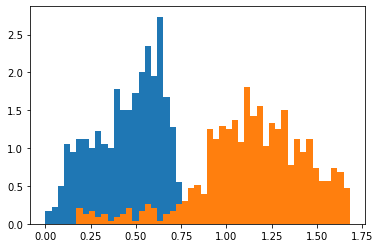

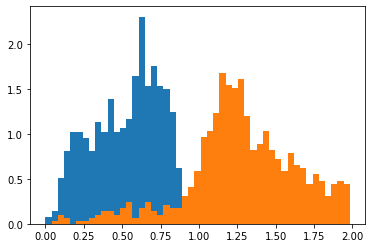

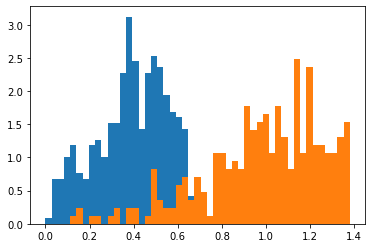

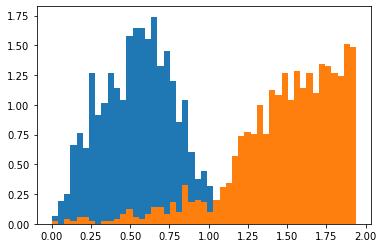

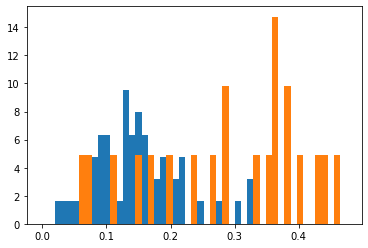

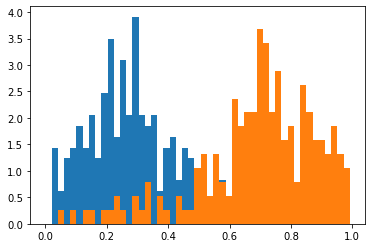

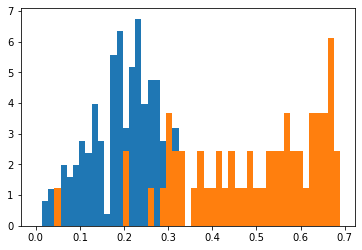

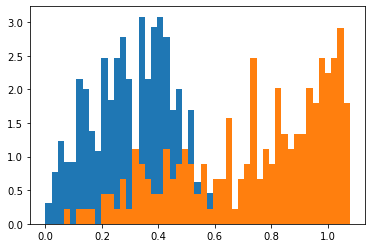

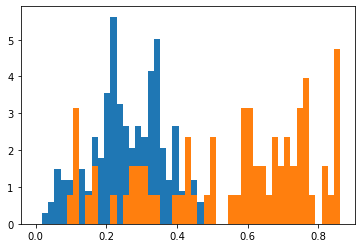

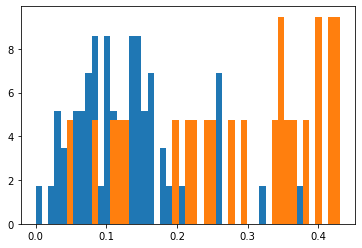

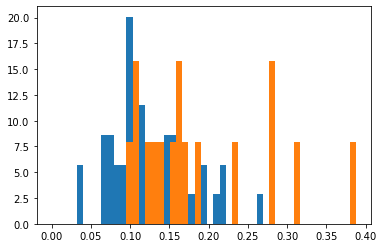

In [246]:
ratios_spec = []
ratios_lib = []
rs_plot = []

factor = 3.5

for i,r50 in enumerate(r_50s):
    fig, ax = plt.subplots()
    bin_50s = np.linspace(0,r50*factor,50)
    
    p,b,o = ax.hist(rs_spec[i],bins=bin_50s,density=True)
    pl,bl,ol = ax.hist(rs_lib[i],bins=bin_50s,density=True)
    fig.show()
    
    ratio_spec = [a/(a + b) for a,b in zip(p,pl)]
    ratio_lib = [b/(a + b) for a,b in zip(p,pl)]
    
    rs_plot.append(b[1:])
    ratios_spec.append(ratio_spec)
    ratios_lib.append(ratio_lib)

In [247]:
def nan_fixer(array):
    new_array = []
    for i,val in enumerate(array):
        if math.isnan(val):
            if i == 0:
                new_array.append(1) # should be center of cluster, should have apoint
            else:
                try:
                    if math.isnan(array[i-1]) or math.isnan(array[i+1]):
    #                     print('Multiple nans!')
                        new_array.append(0)
                    else:
                        new_array.append((array[i-1] + array[i+1])/2)
                except IndexError:
    #                 print('error')
                    new_array.append(0)
        else:
            new_array.append(val)
    return new_array

def nan_replacer(array,new_val=0):
    new_array = []
    for val in array:
        if math.isnan(val):
            if i == 0:
                new_array.append(1)
            else:
                new_array.append(new_val)
        else:
            new_array.append(val)
    return new_array

rat_spec_nonans = [nan_fixer(array) for array in ratios_spec]
rat_lib_nonans = [nan_fixer(array) for array in ratios_lib]

rat_spec_replace = [nan_replacer(array) for array in ratios_spec]
rat_lib_replace = [nan_replacer(array) for array in ratios_lib]

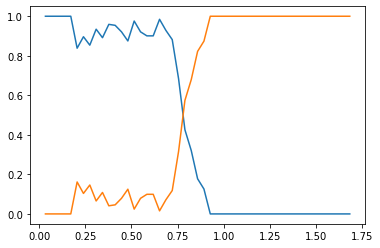

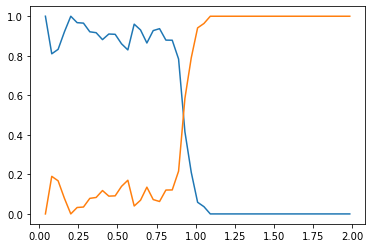

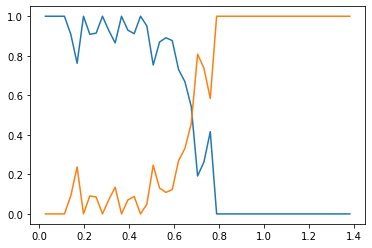

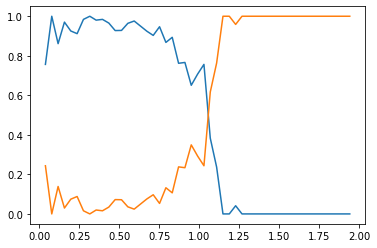

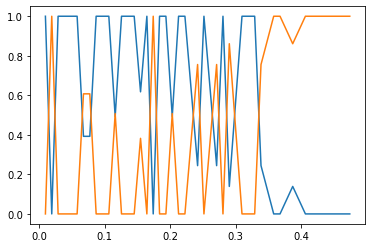

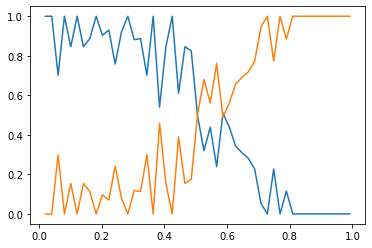

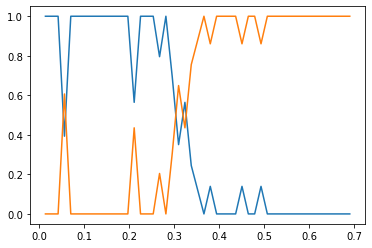

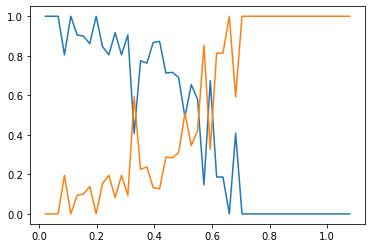

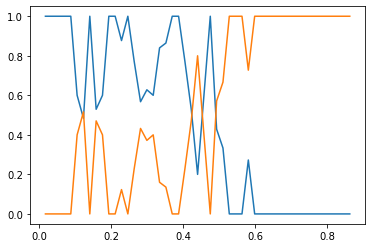

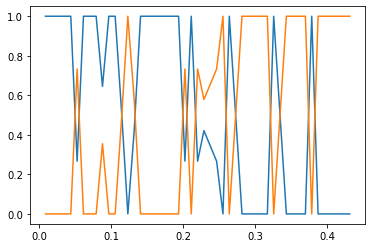

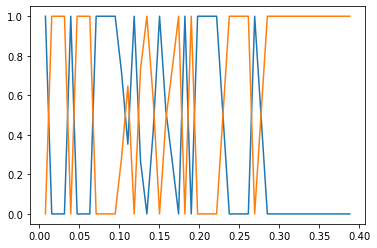

In [256]:
for rat_spec,rat_lib,r_plot in zip(rat_spec_nonans,rat_lib_nonans,rs_plot):
    fig, ax = plt.subplots()
    ax.plot(r_plot,rat_spec)
    ax.plot(r_plot,[1 - a for a in rat_spec])

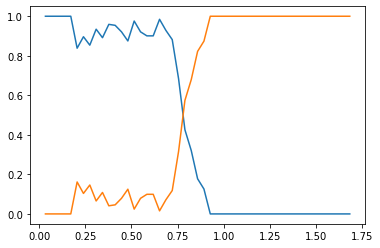

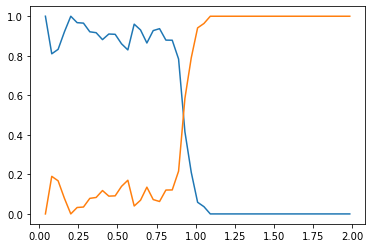

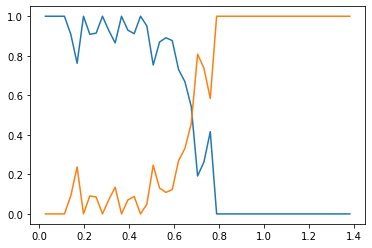

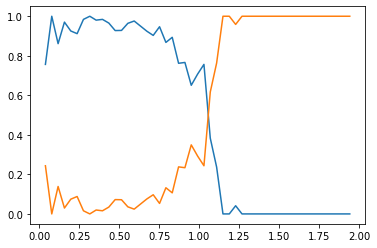

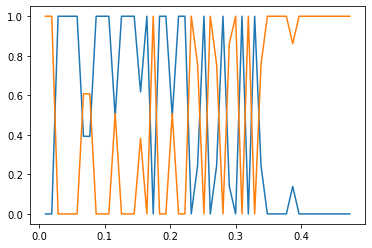

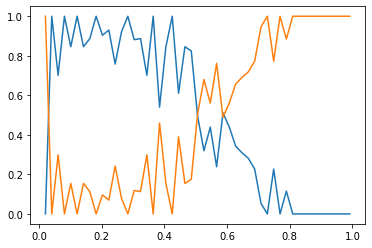

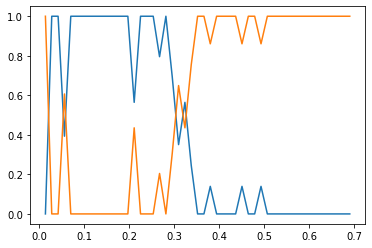

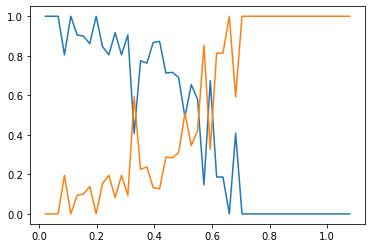

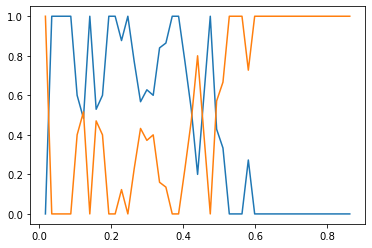

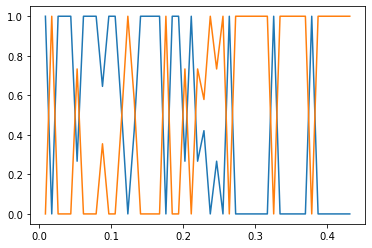

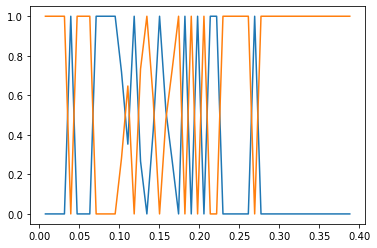

In [257]:
for rat_spec,rat_lib,r_plot in zip(rat_spec_replace,rat_lib_replace,rs_plot):
    fig, ax = plt.subplots()
    ax.plot(r_plot,rat_spec)
    ax.plot(r_plot,[1 - a for a in rat_spec])

#### filtered

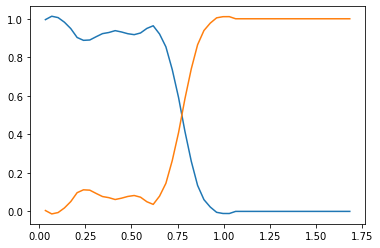

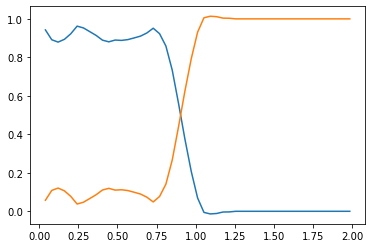

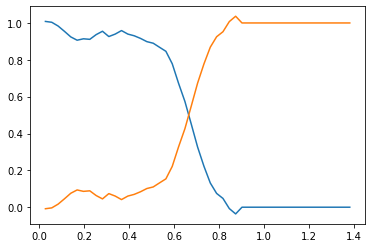

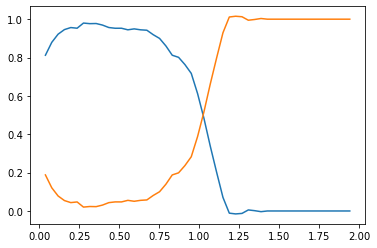

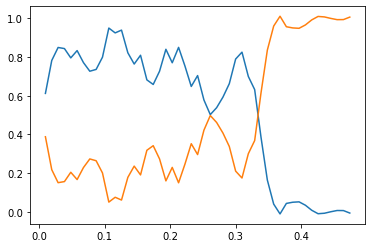

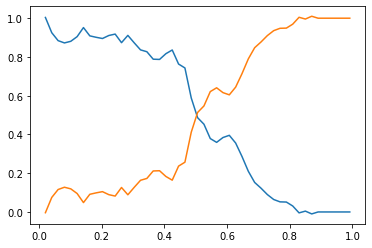

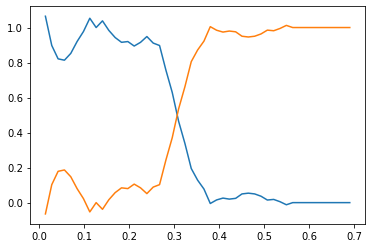

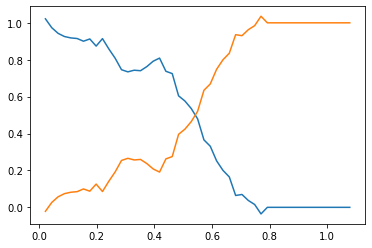

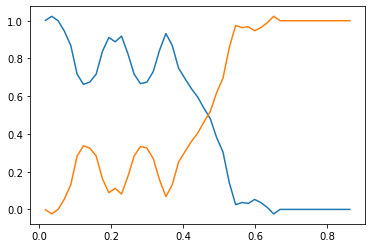

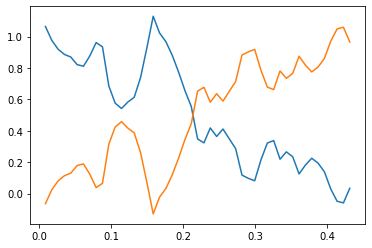

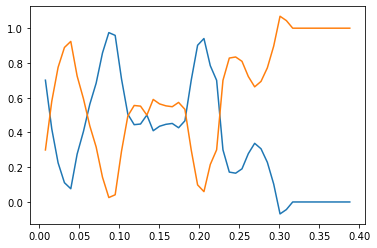

In [261]:
for rat_spec,rat_lib,r_plot in zip(rat_spec_nonans,rat_lib_nonans,rs_plot):
    fig, ax = plt.subplots()
    ax.plot(r_plot,savgol_filter(rat_spec,10,3))
    ax.plot(r_plot,savgol_filter([1 - a for a in rat_spec],10,3))

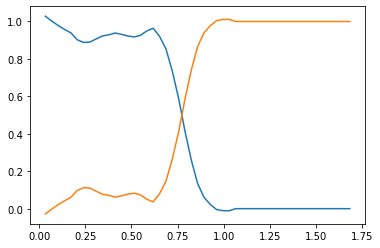

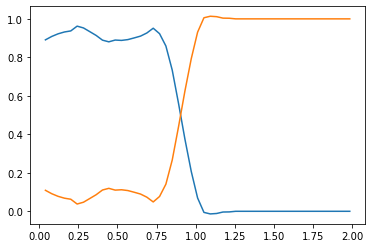

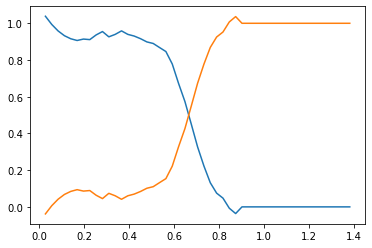

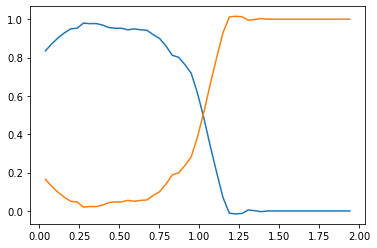

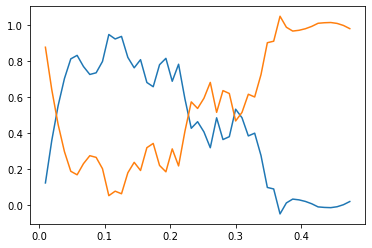

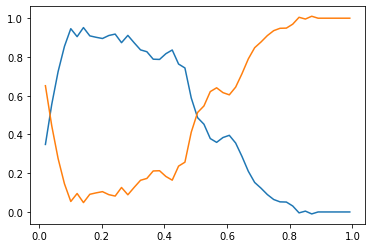

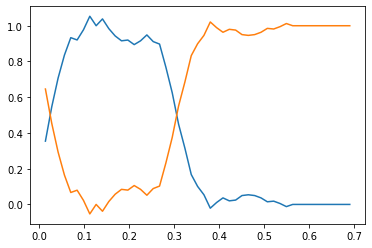

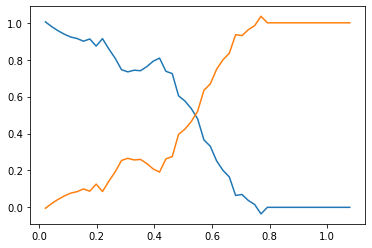

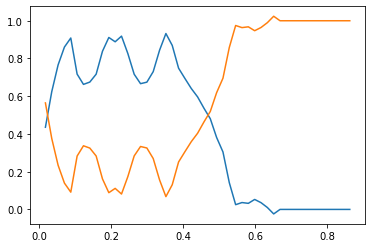

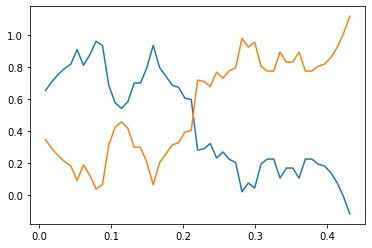

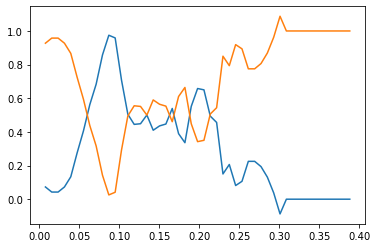

In [255]:
for rat_spec,rat_lib,r_plot in zip(rat_spec_replace,rat_lib_replace,rs_plot):
    fig, ax = plt.subplots()
    ax.plot(r_plot,savgol_filter(rat_spec,10,2))
    ax.plot(r_plot,savgol_filter([1 - a for a in rat_spec],10,2))

## Try doing sum of probability density as function of x

<ipython-input-335-51af6d503d56>:29: RuntimeWarning: invalid value encountered in double_scalars
  ratio_spec = [a/(a + b) for a,b in zip(p,pl)]
<ipython-input-335-51af6d503d56>:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_lib = [b/(a + b) for a,b in zip(p,pl)]


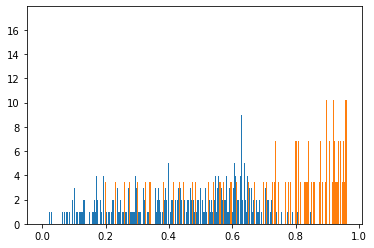

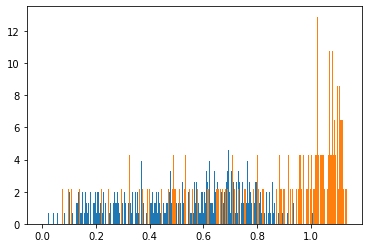

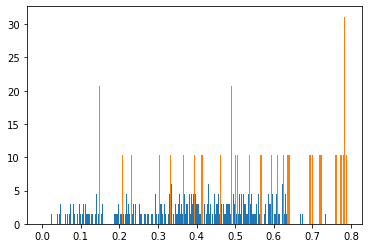

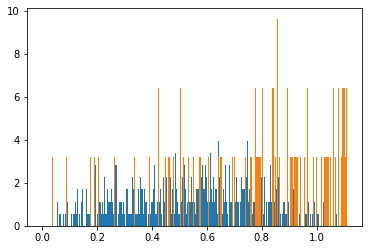

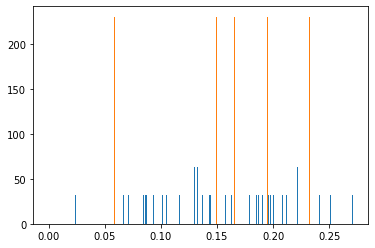

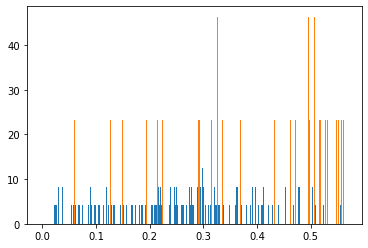

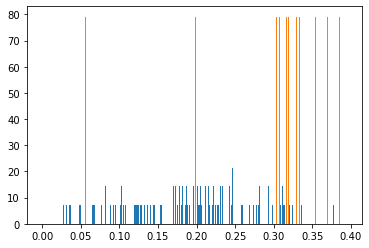

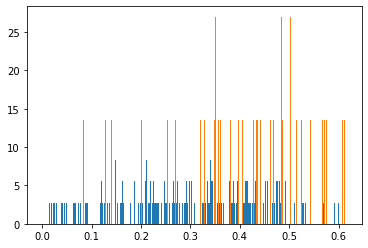

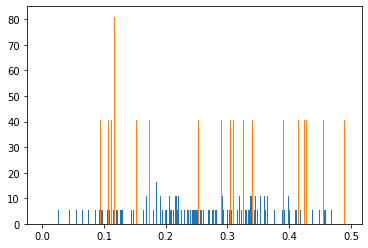

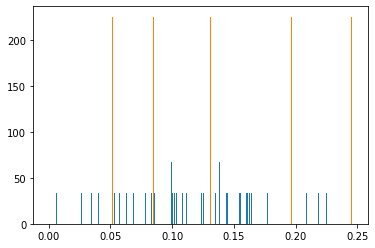

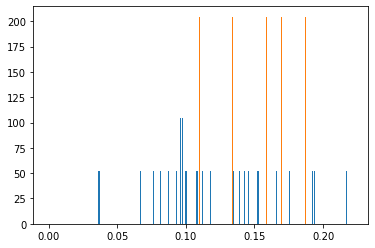

In [335]:
ratios_spec = []
ratios_lib = []
rs_plot = []

ps = []
bs = []
os = []

pls = []
bls = []
ols = []

factor = 2

for i,r50 in enumerate(r_50s):
    fig, ax = plt.subplots()
    bin_50s = np.linspace(0,r50*factor,500)
    
    p,b,o = ax.hist(rs_spec[i],bins=bin_50s,density=True)
    pl,bl,ol = ax.hist(rs_lib[i],bins=bin_50s,density=True)
    
    ps.append(p)
    bs.append(b)
    os.append(o)
    pls.append(pl)
    bls.append(bl)
    ols.append(ol)
    
    ratio_spec = [a/(a + b) for a,b in zip(p,pl)]
    ratio_lib = [b/(a + b) for a,b in zip(p,pl)]
    
    rs_plot.append(b[1:])
    ratios_spec.append(ratio_spec)
    ratios_lib.append(ratio_lib)

In [336]:
densities = []
for i,pdf in enumerate(ps):
    tot = 0
    bins_use = bs[i]
    density = [0]
    for j,p in enumerate(pdf):
        tot += p * np.diff(bins_use)[j]
        density.append(tot)
    densities.append(density)
    
densities_l = []
for i,pdf in enumerate(pls):
    tot = 0
    bins_use = bls[i]
    density = [0]
    for j,p in enumerate(pdf):
        tot += p * np.diff(bins_use)[j]
        density.append(tot)
    densities_l.append(density)

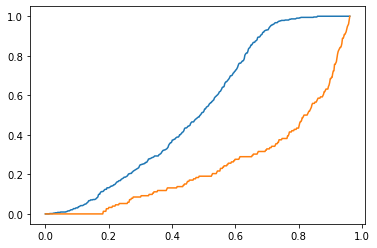

In [337]:
plt.plot(bs[0],densities[0])
plt.plot(bls[0],densities_l[0])

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'UMAP Fingerprint C2')

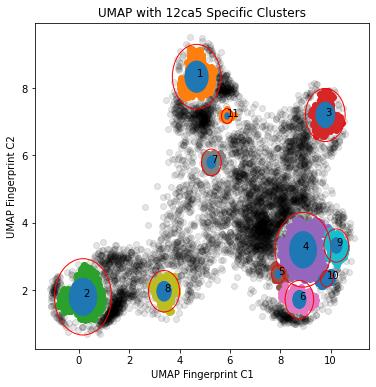

In [338]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(data_lib_all['C1'],data_lib_all['C2'],c='k',alpha=0.1)
centers = []
for i,e in enumerate(uniq_clusters):
    rows = data_final.query('Cluster == @i')
    x = rows['C1']
    y = rows['C2']
    cent_x = np.average(x)
    cent_y = np.average(y)
    if not math.isnan(cent_x):
        centers.append((cent_x,cent_y))
    plt.annotate(i,(cent_x,cent_y))
    ax.scatter(x,y,label=f'Cluster {i}',c=cmap[i])
    if e > 0:
        circle = plt.Circle((cent_x,cent_y),r_50s[e-1])
        circle2 = plt.Circle((cent_x,cent_y),r_50s[e-1]*factor,fill=False,color='red')
        ax.add_artist(circle)
        ax.add_artist(circle2)
ax.set_title('UMAP with 12ca5 Specific Clusters')
ax.set_xlabel('UMAP Fingerprint C1')
ax.set_ylabel('UMAP Fingerprint C2')